# Training the model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

RANDOM_SEED = 42

import time

start = time.time()
print(f'Time: {time.time() - start}')

Time: 5.936622619628906e-05


## Selecting Categories

In [2]:
categories = [
            'alt.atheism',
            'soc.religion.christian',
            'comp.graphics',
            'sci.med',
            'talk.politics.guns'
            ]


In [3]:
train_df = pd.read_csv("dataset/new_train.csv")
test_df = pd.read_csv("dataset/test.csv")

In [4]:
train_df = train_df[train_df['categories'].isin(categories)]
test_df = test_df[test_df['categories'].isin(categories)]

In [5]:
from sklearn.model_selection import train_test_split

train_features, train_labels = train_df['text'], train_df['categories']
test_features, test_labels = test_df['text'], test_df['categories']

In [6]:
train_features.shape

(3268,)

In [7]:
test_features.shape

(1401,)

## Feature Extraction/Engineering

### Transform the words into matrix of TF-IDF features

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(train_features)

train_tfidf = vectorizer.transform(train_features)
test_tfidf = vectorizer.transform(test_features)

## Selecting the best algorithm

In [9]:
from sklearn.naive_bayes import MultinomialNB

start = time.time()
mnb_clf = MultinomialNB().fit(train_tfidf, train_labels)
print(f'Time: {time.time() - start}')

mnb_predicted = mnb_clf.predict(test_tfidf)
print(accuracy_score(mnb_predicted, test_labels))

Time: 0.04415249824523926
0.8857958600999286


In [10]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear', degree=3, gamma='auto') #linear best kernel

start = time.time()
svm_clf.fit(train_tfidf, train_labels)
print(f'Time: {time.time() - start}')

svm_predicted = svm_clf.predict(test_tfidf)
print(accuracy_score(svm_predicted, test_labels))

Time: 16.68227481842041
0.9543183440399714


In [11]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
rfc_clf = RandomForestClassifier(n_estimators=100,warm_start=True).fit(train_tfidf, train_labels)
print(f'Time: {time.time() - start}')

rfc_predicted = rfc_clf.predict(test_tfidf)

print(accuracy_score(rfc_predicted, test_labels))

Time: 5.9099249839782715
0.9150606709493219


In [16]:
from sklearn.neural_network import MLPClassifier

start = time.time()
mlp_clf = MLPClassifier(random_state=42, max_iter=10).fit(train_tfidf, train_labels)
print(f'Time: {time.time() - start}')

mlp_predicted = mlp_clf.predict(test_tfidf)
print(accuracy_score(mlp_predicted, test_labels))

Time: 114.82872033119202
0.9728765167737331


/home/mark/demo-text-classification-scikit/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Plotting the confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

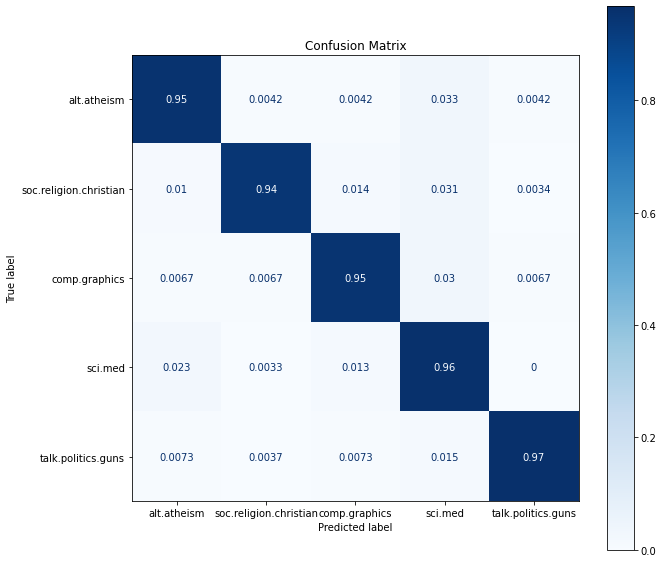

In [14]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 10))

disp = plot_confusion_matrix(svm_clf, test_tfidf, test_labels,
                             display_labels=categories,
                             cmap=plt.cm.Blues,
                             normalize='true',
                             ax=ax)

disp.ax_.set_title("Confusion Matrix")


## Saving Model to a file for later Deployment

In [15]:
import pickle #object serialization library

with open('svm_clf.pickle', 'wb') as pickle_file:
    pickle.dump(svm_clf, pickle_file)
    
with open('vectorizer.pickle', 'wb') as pickle_file:
    pickle.dump(vectorizer, pickle_file)